In [436]:
import rmtchem 
import timeit
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import imp
imp.reload(rmtchem)
plt.rcParams.update({'font.size': 16})
plt.rcParams['pdf.fonttype'] = 42

In the absence of driving, the steady state is determined by the free energies, Xs=np.exp(-G). In this case, the eigenvalues of the Jacobian are real and negative definite.

93


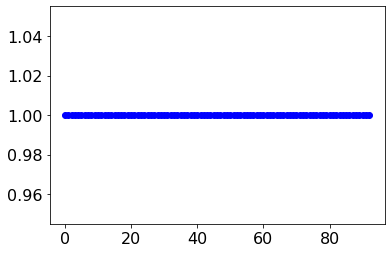

2.305925321858957e-14


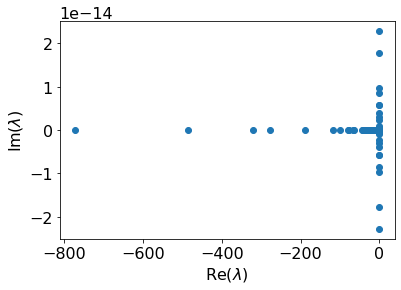

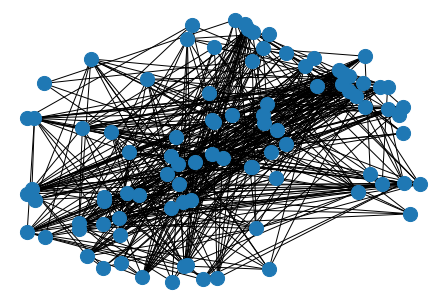

In [445]:
n=100
c=0.6
nr=int(c*n)
seed=31

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
adj=np.zeros((n,n))
for r in range(2*nr):
    reac=np.where(eta[r]>0)[0]
    prod=np.where(nu[r]>0)[0]
    for i in reac:
        for j in prod:
            adj[i,j]=1
        #if species are both reactants, they affect rates of change of each other
        for j in reac:
            adj[i,j]=1
g=nx.convert_matrix.from_numpy_matrix(adj)

lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

print(n)
X0=np.exp(-G)
XD1=np.zeros(n)
XD2=np.zeros(n)
Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2).x
plt.plot(Xs2/X0,'bo')
plt.show()

evals,evecs=np.linalg.eig(rmtchem.jac(X0,eta,nu,k,XD1,XD2))
plt.xlabel('$\mathrm{Re}(\lambda)$')
plt.ylabel('$\mathrm{Im}(\lambda)$')
plt.scatter(x=np.real(evals),y=np.imag(evals))
print(np.max(np.real(evals)))
plt.savefig('plots/fig0b.pdf')
plt.show()
g=nx.from_numpy_matrix(rmtchem.jac(np.exp(-G),eta,nu,k,XD1,XD2))
nx.draw(g,node_size=200)
plt.savefig('plots/fig0a.pdf')
plt.show()
# Xs,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,100,0.1,prog=True)
# plt.plot(Xs)
# plt.show()

(3.798290111294177e-18-4.203290555758915e-17j) (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91]),)


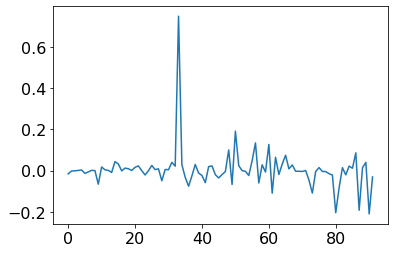

In [444]:
evals,evecs=np.linalg.eig(rmtchem.jac(X0,eta,nu,k,XD1,XD2))
print(evals[-1],np.where(np.abs(evecs[:,-1])>1e-6))
plt.plot(np.real(evecs[:,-1])) #graph is nonsingular, but jacobian has zero. 
plt.show()

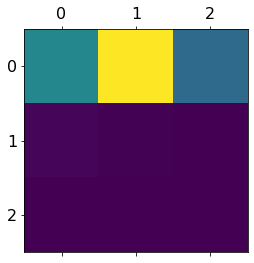

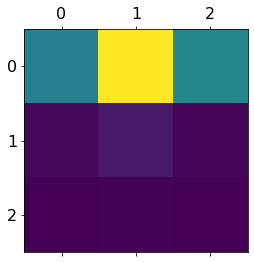

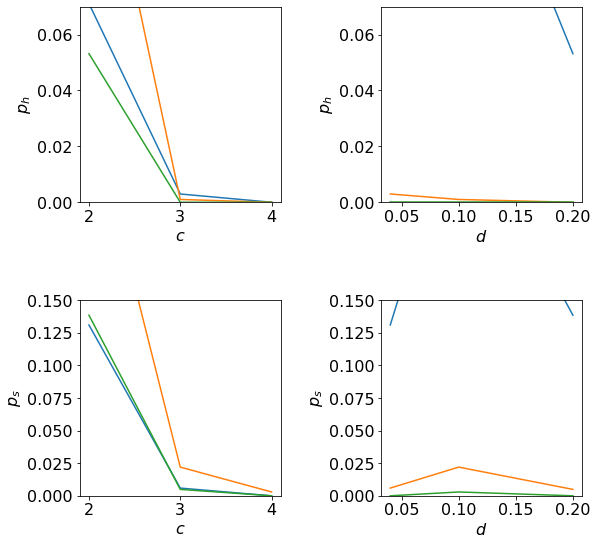

In [4]:
cs=np.array([2,3,4])
ds=np.array([25,10,5])
p=[]
for c in cs:
    props=[]
    for d in ds:
        props.append(np.loadtxt("200_"+str(c)+"_"+str(d)+".txt"))
    p.append(props)
p=np.array(p)
plt.matshow(p[:,:,0])
plt.show()
plt.matshow(p[:,:,1])
plt.show()
plt.subplots(2,2,figsize=(9, 9))
plt.subplot(2,2,1,adjustable='box')
plt.ylim(0.,0.07)
plt.ylabel('$p_h$')
plt.xlabel('$c$')
plt.plot(cs,p[:,:,0])
plt.subplot(2,2,2)
plt.ylim(0.,0.07)
plt.ylabel('$p_h$')
plt.xlabel('$d$')
plt.plot(1/ds,np.transpose(p[:,:,0],axes=(1,0)))
plt.subplot(2,2,3)
plt.ylabel('$p_s$')
plt.xlabel('$c$')
plt.ylim(0.,0.15)
plt.plot(cs,p[:,:,1])
plt.subplot(2,2,4)
plt.ylabel('$p_s$')
plt.xlabel('$d$')
plt.ylim(0.,0.15)
plt.plot(1/ds,np.transpose(p[:,:,1],axes=(1,0)))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


In [6]:
ns=np.array([50,100,200])
cs=np.array([2,3,4])
ds=np.array([25,10,5])

ps=[]
for n in ns:
    p=[]
    for c in cs:
        props=[]
        for d in ds:
            props.append(np.loadtxt(str(n)+"_"+str(c)+"_"+str(d)+".txt"))
        p.append(props)
    ps.append(p)
ps=np.array(ps)

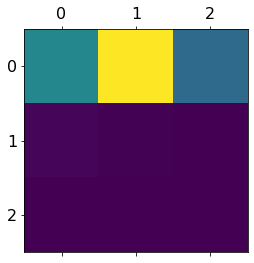

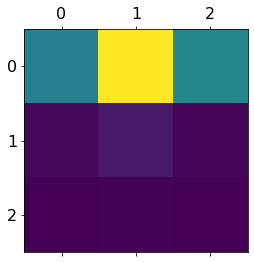

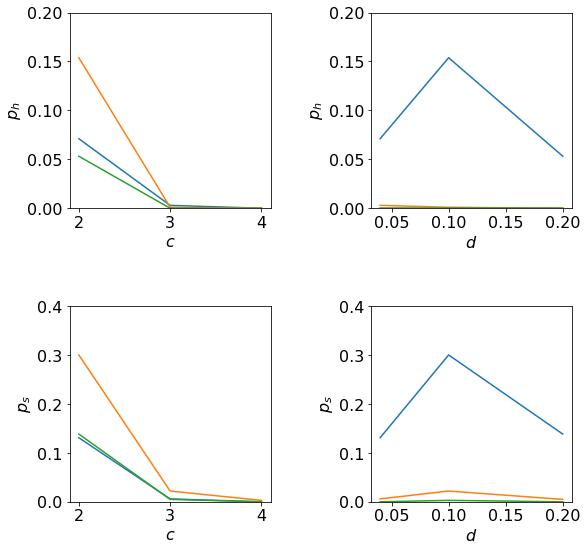

In [13]:
plt.matshow(ps[-1,:,:,0])
plt.show()
plt.matshow(ps[-1,:,:,1])
plt.show()
plt.subplots(2,2,figsize=(9, 9))
plt.subplot(2,2,1,adjustable='box')
plt.ylim(0.,0.2)
plt.ylabel('$p_h$')
plt.xlabel('$c$')
plt.plot(cs,ps[-1,:,:,0])
plt.subplot(2,2,2)
plt.ylim(0.,0.2)
plt.ylabel('$p_h$')
plt.xlabel('$d$')
plt.plot(1/ds,np.transpose(ps[-1,:,:,0],axes=(1,0)))
plt.subplot(2,2,3)
plt.ylabel('$p_s$')
plt.xlabel('$c$')
plt.ylim(0.,0.4)
plt.plot(cs,ps[-1,:,:,1])
plt.subplot(2,2,4)
plt.ylabel('$p_s$')
plt.xlabel('$d$')
plt.ylim(0.,0.4)
plt.plot(1/ds,np.transpose(ps[-1,:,:,1],axes=(1,0)))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

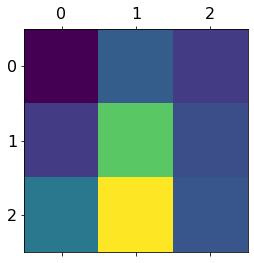

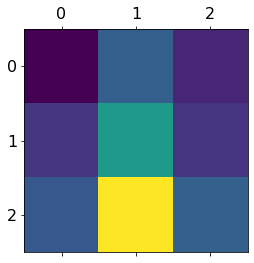

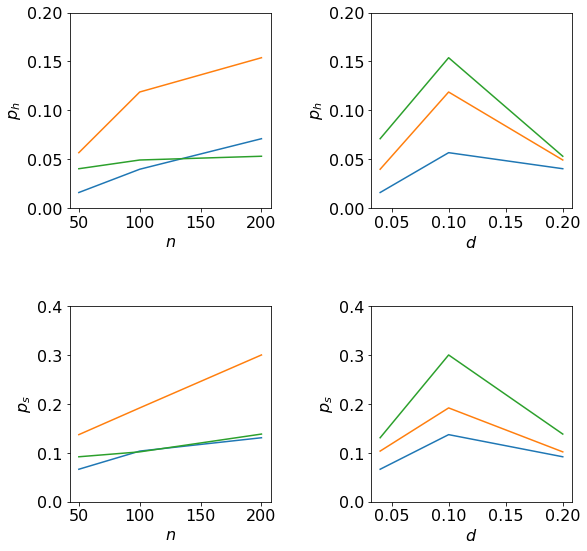

In [12]:
plt.matshow(ps[:,0,:,0])
plt.show()
plt.matshow(ps[:,0,:,1])
plt.show()
plt.subplots(2,2,figsize=(9, 9))
plt.subplot(2,2,1,adjustable='box')
plt.ylim(0.,0.2)
plt.ylabel('$p_h$')
plt.xlabel('$n$')
plt.plot(ns,ps[:,0,:,0])
plt.subplot(2,2,2)
plt.ylim(0.,0.2)
plt.ylabel('$p_h$')
plt.xlabel('$d$')
plt.plot(1/ds,np.transpose(ps[:,0,:,0],axes=(1,0)))
plt.subplot(2,2,3)
plt.ylabel('$p_s$')
plt.xlabel('$n$')
plt.ylim(0.,0.4)
plt.plot(ns,ps[:,0,:,1])
plt.subplot(2,2,4)
plt.ylabel('$p_s$')
plt.xlabel('$d$')
plt.ylim(0.,0.4)
plt.plot(1/ds,np.transpose(ps[:,0,:,1],axes=(1,0)))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

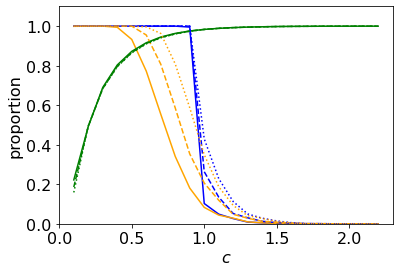

In [459]:
n=200
ns=[50,100,200]
ls=['-','--',':']
plt.xlabel('$c$')
plt.ylabel("proportion")
plt.ylim(0,1.1)
for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'/scounts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,4]/n,color='green',linestyle=ls[i])
plt.savefig("plots/fig0c.pdf",transparent=True)
plt.show()

When we introduce small driving in the same network, the steady state is perturbed and some eigenvalues become complex. We can find the steady state with root finding, and the same steady state is found by numerical integration.

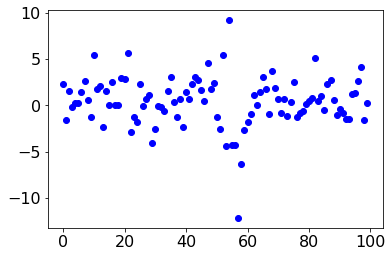

Calculated dynamics in  2.9275454399999994 seconds


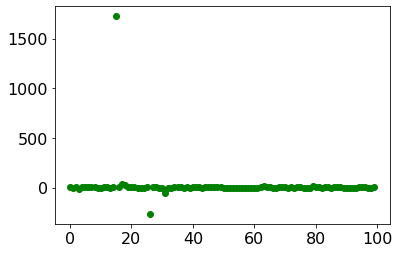

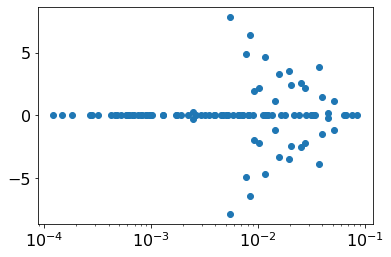

-11.762077182145166


In [3]:
np.random.seed(1)
eta,nu,k,G=rmtchem.get_network(n,nr)

drive0=1e3
drive=3

XD1=np.zeros(n)
XD2=np.zeros(n)
ndrives=10
inds=np.random.choice(range(n),size=ndrives,replace=False)
scales=np.exp(-G[inds])
XD2[inds]=drive0
XD1[inds]=scales*drive*drive0

X0=np.exp(-G)
Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2).x
plt.plot(Xs2/X0,'bo')
plt.show()

t1=100
dt=1
start=timeit.default_timer()
Xs3,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,t1,dt)
stop=timeit.default_timer()
print("Calculated dynamics in ", stop-start, "seconds")
plt.plot(Xs3[-1]/Xs2,'go')
plt.show()
evals,evecs=np.linalg.eig(rmtchem.jac(Xs3[-1],eta,nu,k,XD1,XD2))
plt.xscale('log')
plt.scatter(x=-1/np.real(evals),y=np.imag(evals))
plt.show()
print(np.max(np.real(evals)))

Adiabatically turning on driving then increasing driving amplitude, track the maximum eigenvalues

Saddle-node for iseed=1 around m=140 with 
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
n=100 c=2
seed0=1 numseeds=10 ndrives=3
steps=100 d0min=-1 d0max=3
steps2=200 dmin=1 dmax=20!

TODO: make this an quasistatic function, taking d0min, d0max, d1min, d1max

0.426	1	2



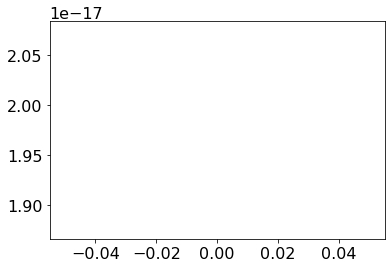

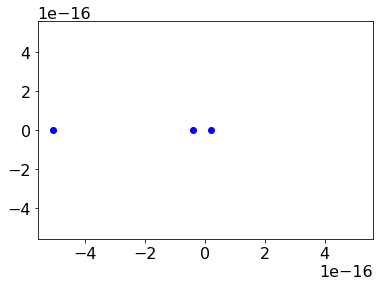

(1.9750367246273554e-17+0j)
False 0.048274243937137265


KeyboardInterrupt: 

In [158]:
filebase='data/test'
file=open(filebase+'out.dat','r')
[n,nr,nd,seed,steps,skip,d0,d1max]=np.array(file.readline().split(),dtype=float)
[n,nr,nd,seed,steps,skip]=np.array([n,nr,nd,seed,steps,skip],dtype=int)
print(file.readline())
file.close()
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
d1min=1
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
evals=np.load(filebase+'evals.npy')
Xs=np.load(filebase+'Xs.npy')
XD1s=np.zeros((steps,n))
XD2s=np.zeros((steps,n))
inds=np.argsort(np.exp(-G))[:nd]
scales=np.exp(-G[inds])
for m in range(steps):
    XD1s[m,inds]=d1s[m]*d0*scales
    XD2s[m,inds]=d0
plt.plot(np.max(np.real(evals),axis=1))
plt.show()
lim=1.1*np.max(np.abs(evals[-1,np.argsort(np.real(evals[-1]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.plot(np.real(evals[-1]),np.imag(evals[-1]),'bo')
plt.show()
print(evals[-1,np.argsort(np.real(evals[-1]))[-1]])

mmax=len(Xs)
m=mmax-1
X0=Xs[m]
XD1=XD1s[(m+1)*skip]
XD2=XD2s[(m+1)*skip]
sol=rmtchem.steady(X0, eta, nu, k, XD1,XD2)
print(sol.success,np.min(sol.x),flush=True)
X0=Xs[m]
X2,success=rmtchem.integrate(X0, eta, nu, k, XD1,XD2,1000,0.1,prog=True)
plt.plot(X2)
plt.show()
sol=rmtchem.steady(X2[-1], eta, nu, k, XD1,XD2)
print(sol.success,np.min(sol.x),flush=True)

In [58]:
seeds=np.loadtxt('data/100/seeds.txt',dtype=int)
print('seed\tsubcrit\thopf')
for seed in seeds:
    filebase='data/100/'+str(seed)
    evals1=np.load(filebase+'evals1.npy')
    evals2=np.load(filebase+'evals2.npy')
    print('%i\t%i\t%i'%(seed,np.max(np.abs(np.max(np.real(evals1),axis=1)-np.max(np.real(evals2),axis=1)))>1e-2,np.max(np.real(evals1))>0))

seed	subcrit	hopf
2	0	1
17	0	1
35	1	0
42	1	1
46	0	1
58	1	0
59	1	0
62	1	1
64	1	0
74	1	0
80	1	0
82	1	1
94	0	1
100	1	1
103	1	0
112	1	0
115	1	0
116	1	1
117	1	1
118	0	1
119	1	0
120	1	0
124	0	1
138	1	0
145	0	1
152	1	1
167	1	0
196	0	1
207	0	1
211	0	1
213	1	0
214	1	1
219	1	0
228	0	1
232	0	1
233	1	1
240	1	0


Integration: 100%|##############################################| Time: 0:00:00


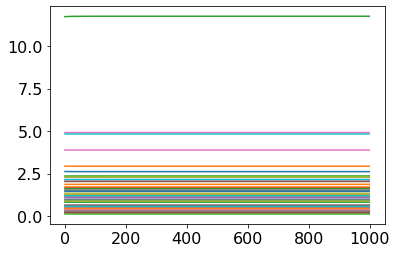

The solution converged.


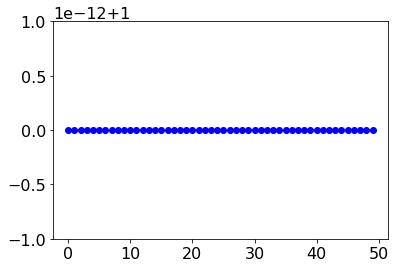

-0.4022646943827179


In [471]:
imp.reload(rmtchem)

n=50
c=2
nr=int(c*n)
ndrives=int(n/10)
seeds=10
seed0=1
steps1=1
steps2=1000
d0min=-1
d0max=3
d0s=10.0**np.arange(d0min,d0max,(d0max-d0min)/steps2)
d1min=1
d1max=100
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps2)

iseed=64

np.random.seed(seed0+iseed)
eta,nu,k,G=rmtchem.get_network(n,nr)
# X0=np.exp(-G)
# X0=np.random.random(size=n)
#inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
# inds=np.argsort(-G)[-ndrives:]
# inds=np.random.choice(np.arange(n), size=ndrives, replace=False)
inds=np.argsort(np.exp(-G))[:ndrives]
# scales=np.random.random(size=ndrives)
scales=np.exp(-G[inds])

XD1s=np.zeros((steps1+steps2,n))
XD2s=np.zeros((steps1+steps2,n))
for m in range(steps1):
    XD1s[m,inds]=d0s[m]*scales
    XD2s[m,inds]=d0s[m]
for m in range( steps2):
    XD1s[steps1+m,inds]=d1s[m]*d0s[-1]*scales
    XD2s[steps1+m,inds]=d0s[-1]
    
m=1
Xs,success=rmtchem.integrate(X0*(1+(np.random.random(size=n)-0.5)*1e-2), eta, nu, k, XD1s[m], XD2s[m],100,0.1,prog=True)
sol=rmtchem.steady(X0, eta, nu, k, XD1s[m], XD2s[m])
plt.plot(Xs)
plt.show()
plt.plot(sol.x/Xs[-1],'bo')
print(sol.message)
plt.show()
X0=sol.x
evals,evecs=np.linalg.eig(rmtchem.jac(X0, eta, nu, k, XD1s[m], XD2s[m]))
print(np.max(np.real(evals)))

In [480]:
print(np.min(np.exp(-G)),np.max(np.exp(-G)))
np.argsort(np.exp(-G))
np.exp(-G)[np.argsort(np.exp(-G))[-ndrives:]]

0.1342083805715233 11.750855426770926


array([ 2.93794376,  3.88713308,  4.80424733,  4.91894961, 11.75085543])

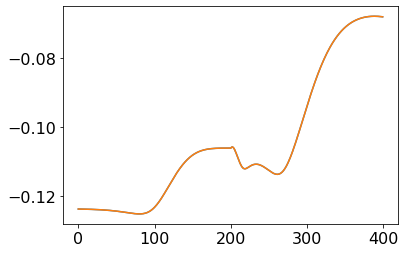

16.043820743000197 7.807143820315332e-12


In [21]:
imp.reload(rmtchem)

n=100
c=2
nr=int(c*n)
seed=2
ndrives=int(n/10)

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
X0=np.exp(-G)
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
scales=np.random.random(size=ndrives)

steps1=200
steps2=200
XD1s=np.zeros((steps1+steps2,n))
XD2s=np.zeros((steps1+steps2,n))
d0min=-1
d0max=3
d0s=10.0**np.arange(d0min,d0max,(d0max-d0min)/steps2)
d1min=1
d1max=20
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps2)
for m in range(steps1):
    XD1s[m,inds]=d0s[m]*scales
    XD2s[m,inds]=d0s[m]
for m in range( steps2):
    XD1s[steps1+m,inds]=d1s[m]*d0s[-1]*scales
    XD2s[steps1+m,inds]=d0s[-1]
    
start=timeit.default_timer()
evals1,evals2=rmtchem.hysteresis(X0, eta, nu, k, XD1s, XD2s)
stop=timeit.default_timer()
plt.plot(evals1)
plt.plot(np.flip(evals2,axis=0))
plt.show()
print(stop-start,np.max(np.real(evals1-np.flip(evals2,axis=0))))

driving
1.4141221527097514e-09


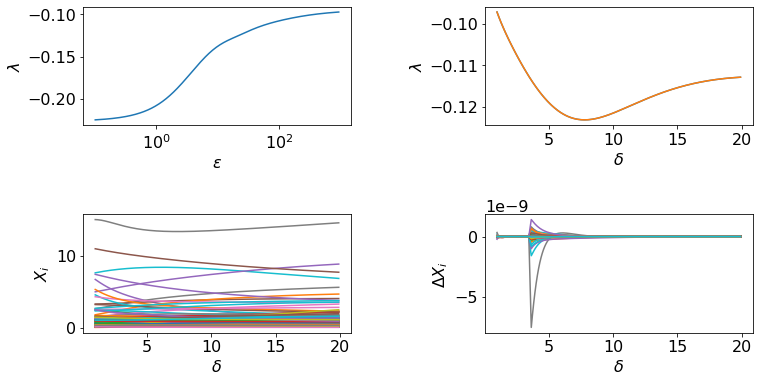

In [366]:
n=100
c=2
nr=int(c*n)
seed=7
np.random.seed(seed)

ndrives=3
eta,nu,k,G=rmtchem.get_network(n,nr)
X0=np.exp(-G)
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
# inds=np.argsort(G)[-ndrives:]
scales=np.random.random(size=ndrives)

steps=200
XD1s=np.zeros((steps,n))
XD2s=np.zeros((steps,n))
d0min=-1
d0max=3
d0s=10.0**np.arange(d0min,d0max,(d0max-d0min)/steps)
for m in range(steps):
    XD1s[m,inds]=d0s[m]*scales
    XD2s[m,inds]=d0s[m]

Xs1=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s)
mevals1=np.array([np.max(np.real(np.linalg.eig(rmtchem.jac(Xs1[m],eta,nu,k,XD1s[m], XD2s[m]))[0])[np.where(np.real(np.linalg.eig(rmtchem.jac(Xs1[m],eta,nu,k,XD1s[m], XD2s[m]))[0])!=0)]) for m in range(steps)])

print("driving")
steps=200
XD1s=np.zeros((steps,n))
XD2s=np.zeros((steps,n))
d1min=1
d1max=20
d1s=d1min+(d1max-d1min)*np.arange(steps)/steps
for m in range(steps):
    XD1s[m,inds]=d1s[m]*d0s[-1]*scales
    XD2s[m,inds]=d0s[-1]
Xs2=rmtchem.quasistatic(Xs1[-1], eta, nu, k, XD1s, XD2s)
mevals2=np.array([np.max(np.real(np.linalg.eig(rmtchem.jac(Xs2[m],eta,nu,k,XD1s[m], XD2s[m]))[0])[np.where(np.real(np.linalg.eig(rmtchem.jac(Xs2[m],eta,nu,k,XD1s[m], XD2s[m]))[0])!=0)]) for m in range(steps)])
XD3s=np.flip(XD1s,axis=0)
XD4s=np.flip(XD2s,axis=0)
Xs3=rmtchem.quasistatic(Xs2[-1], eta, nu, k, XD3s, XD4s)
mevals3=np.array([np.max(np.real(np.linalg.eig(rmtchem.jac(Xs3[m],eta,nu,k,XD3s[m], XD4s[m]))[0])[np.where(np.real(np.linalg.eig(rmtchem.jac(Xs3[m],eta,nu,k,XD3s[m], XD4s[m]))[0])!=0)]) for m in range(steps)])
print(np.max(Xs2-np.flip(Xs3,axis=0)))

fix,ax=plt.subplots(2,2,figsize=(12, 6))
plt.subplot(2,2,1)
plt.xlabel("$\epsilon$")
plt.ylabel("$\lambda$")
plt.xscale('log')
plt.plot(d0s,mevals1)
plt.subplot(2,2,2)
plt.xlabel("$\delta$")
plt.ylabel("$\lambda$")
plt.plot(d1s,mevals2)
plt.plot(np.flip(d1s),mevals3)
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,2,3)
plt.xlabel("$\delta$")
plt.ylabel("$X_i$")
plt.plot(d1s,Xs2)
plt.subplot(2,2,4)
plt.xlabel("$\delta$")
plt.ylabel("$\Delta X_i$")
plt.plot(d1s,Xs2-np.flip(Xs3,axis=0))
plt.show()
plt.show()

True The solution converged.


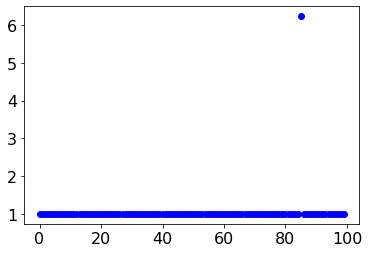

0 The solution converged.


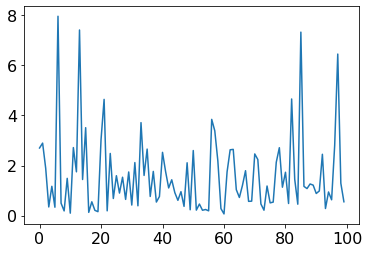

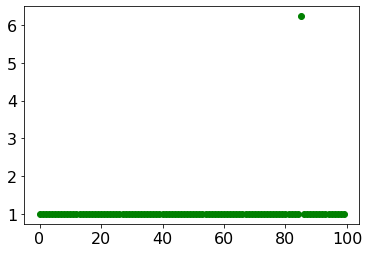

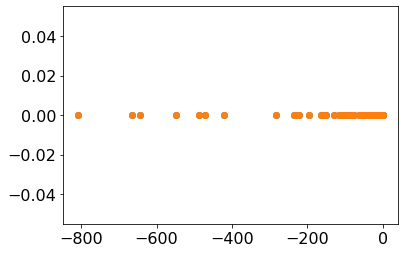

0.0 0.0


In [321]:
from scipy.optimize import root
seed=48
ndrives=3

m=0
m0=0
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
X0=np.exp(-G)
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
scales=np.random.random(size=ndrives)

XD1=XD1s[1]*0
XD2=XD2s[1]*0
X0=Xs2[1]
X0=np.exp(-G)
# X0=np.random.random(size=n)

sol=rmtchem.steady(X0,eta,nu,k,XD1,XD2)
print(sol.success,sol.message)
evals,evecs=np.linalg.eig(rmtchem.jac(sol.x,eta,nu,k,XD1,XD2))

plt.plot(sol.x/X0,'bo')
plt.show()
# X0=Xs2

count=0
sol2=rmtchem.steady(X0,eta,nu,k,XD1,XD2)    
X00=X0
while not sol2.success:
    Xi,success=rmtchem.integrate(X00,eta,nu,k,XD1,XD2,n,5000,100)
    X00=Xi[-1]
    sol2=rmtchem.steady(X00,eta,nu,k,XD1,XD2)    
    count=count+1
print(count, sol2.message)

plt.plot(sol2.x)
plt.show()
plt.plot(sol2.x/X0,'go')
plt.show()
evals4,evecs4=np.linalg.eig(rmtchem.jac(sol2.x,eta,nu,k,XD1,XD2))

plt.scatter(x=np.real(evals),y=np.imag(evals))
plt.scatter(x=np.real(evals4),y=np.imag(evals4))
plt.show()
print(np.max(np.real(evals)),np.max(np.real(evals4)))